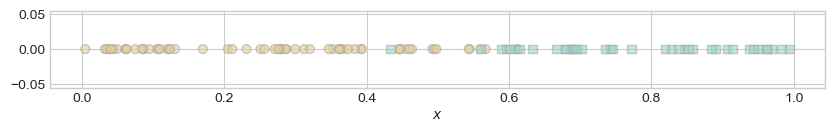

In [1]:
import torch 
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
n_points = 100
x = torch.rand(n_points)
y = 1*((x + 0.3*(torch.rand(n_points) - 0.5)) > 0.5 )

def plot_1d_classification_data(x, y, ax):
    
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(x[ix], torch.zeros_like(x[ix]), s = 40,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -1, vmax = 2, alpha = 0.6, marker = markers[i], )
    ax.set(xlabel = r"$x$")
    
fig, ax = plt.subplots(figsize = (10, 1))
plot_1d_classification_data(x, y, ax)

In [2]:
x_space = torch.linspace(0, 1, 1001)

In [9]:
def kernel_classifier(x_space, x, y, gamma):
    
    # compute difference between every elem in x_space and x
    diffs = x_space[:, None] - x
    
    prod = y * torch.exp(-gamma * diffs**2)
    
    s = torch.sum(prod, dim=1)
    
    return s

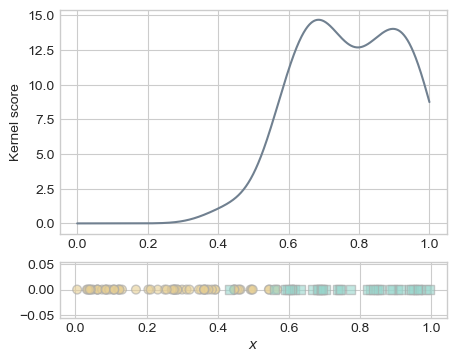

In [10]:
s = kernel_classifier(x_space, x, y, gamma=100)

fig, ax = plt.subplots(2, 1, figsize = (5, 4), height_ratios= (0.8, 0.2))
ax[0].plot(x_space, s, color = "slategrey")
ax[0].set(ylabel = "Kernel score")
plot_1d_classification_data(x, y, ax[1])

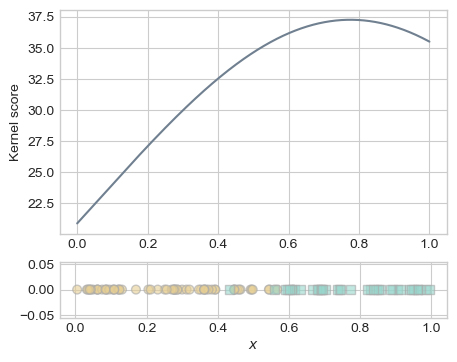

In [11]:
s = kernel_classifier(x_space, x, y, gamma=1)

fig, ax = plt.subplots(2, 1, figsize = (5, 4), height_ratios= (0.8, 0.2))
ax[0].plot(x_space, s, color = "slategrey")
ax[0].set(ylabel = "Kernel score")
plot_1d_classification_data(x, y, ax[1])

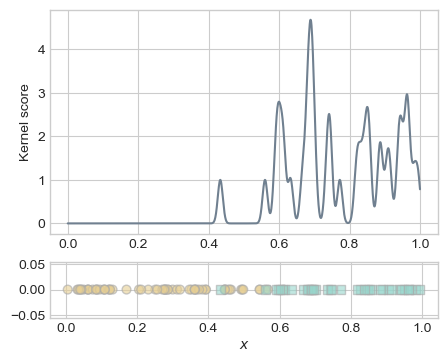

In [12]:
s = kernel_classifier(x_space, x, y, gamma=10000)

fig, ax = plt.subplots(2, 1, figsize = (5, 4), height_ratios= (0.8, 0.2))
ax[0].plot(x_space, s, color = "slategrey")
ax[0].set(ylabel = "Kernel score")
plot_1d_classification_data(x, y, ax[1])